# Introduction

## Sales Forecasting Model

This repository contains a sales forecasting model built using Python and the statsmodels library. The model uses historical sales data and advertising metrics to predict future sales. The main features of this project include:

1. Data Cleaning:
The raw data is imported from a CSV file and preprocessed. Date columns are converted to datetime objects, and numeric fields (such as Sales and Digital_Ads) are cleaned by removing commas and converting them into appropriate numeric types.

2. Model Building:
A multiple linear regression model is constructed using advertising variables including TVCM_GPR, Print_Media, Offline_Ads, and Digital_Ads. A constant term is added to account for the baseline sales level.

3. Train/Test Split:
The “Actual” sales data is split into training (80%) and test (20%) sets. The model is trained on the training set and its predictive performance is evaluated on the test set using metrics like RMSE and R².

4. Forecasting:
After evaluating the model, forecast data (rows marked with “Forecast” in the Record_Type column) is used to predict future sales. These forecast values are both printed to the console and visualized alongside historical data.

5. Visualization:
The repository includes code to generate plots that compare actual versus predicted sales over time and display residuals. A clear demarcation is made between the training and forecast periods.

This base model is designed without incorporating additional dummy variables (such as those for seasonal or holiday effects). As a result, while its accuracy may be lower than more sophisticated models, it provides a clear and straightforward structure to help understand the fundamentals of sales forecasting.

# Import Library and Read File

In [1]:
!pip install japanize_matplotlib
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
input_file ="../data/sales_data.csv"
df = pd.read_csv(input_file)
df.head()

,Date,Sales,TVCM_GPR,Print_Media,Offline_Ads,Digital_Ads,Record_Type
0,9/7/15,"5,554,981",58.86750,20340000,5890000,"23,080",Actual
1,9/14/15,"6,071,669",235.18125,15470000,5740000,"29,979",Actual
2,9/21/15,"5,798,657",252.18375,8325000,0,"23,784",Actual
3,9/28/15,"6,235,157",75.25500,0,0,"26,732",Actual
4,10/5/15,"6,861,105",0.00000,0,0,"28,823",Actual


In [3]:
df.tail()

,Date,Sales,TVCM_GPR,Print_Media,Offline_Ads,Digital_Ads,Record_Type
116,11/27/17,NaN,79.3800,15450000,0,"31,769",Forecast
117,12/4/17,NaN,41.4900,9930000,0,"34,799",Forecast
118,12/11/17,NaN,0.0000,16280000,0,"31,907",Forecast
119,12/18/17,NaN,81.2625,13350000,5890000,"31,048",Forecast
120,12/25/17,NaN,44.5725,15030000,9150000,"59,196",Forecast


# Preprocess

In [4]:
df.isnull().sum()

Date            0
Sales          16
TVCM_GPR        0
Print_Media     0
Offline_Ads     0
Digital_Ads     0
Record_Type     0
dtype: int64

In [5]:
df.duplicated(subset=['Date']).sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         121 non-null    object 
 1   Sales        105 non-null    object 
 2   TVCM_GPR     121 non-null    float64
 3   Print_Media  121 non-null    int64  
 4   Offline_Ads  121 non-null    int64  
 5   Digital_Ads  121 non-null    object 
 6   Record_Type  121 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.7+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Sales'] = pd.to_numeric(df['Sales'].str.replace(',', ''), errors='coerce').fillna(0).astype('int64')
df['Digital_Ads'] = pd.to_numeric(df['Digital_Ads'].str.replace(',', ''), errors='coerce').astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         121 non-null    datetime64[ns]
 1   Sales        121 non-null    int64         
 2   TVCM_GPR     121 non-null    float64       
 3   Print_Media  121 non-null    int64         
 4   Offline_Ads  121 non-null    int64         
 5   Digital_Ads  121 non-null    int64         
 6   Record_Type  121 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 6.7+ KB


/var/folders/_n/cr9xqtgn70g_tclcyk9hd0nw0000gn/T/ipykernel_49577/4028378914.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df_actual = df[df['Record_Type'] == "Actual"].copy()

# Simple Regression Model Building

In [9]:
Y_actual = df_actual['Sales']
X_actual = df_actual[['TVCM_GPR', 'Print_Media', 'Offline_Ads', 'Digital_Ads']]
X_actual = sm.add_constant(X_actual)  # Add intercept

X_train, X_test, y_train, y_test = train_test_split(X_actual, Y_actual, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train).fit()
print("Training Model Summary:")
print(model.summary())

y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)


Training Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     26.39
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           6.57e-14
Time:                        10:35:03   Log-Likelihood:                -1242.3
No. Observations:                  84   AIC:                             2495.
Df Residuals:                      79   BIC:                             2507.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.529e+06   1

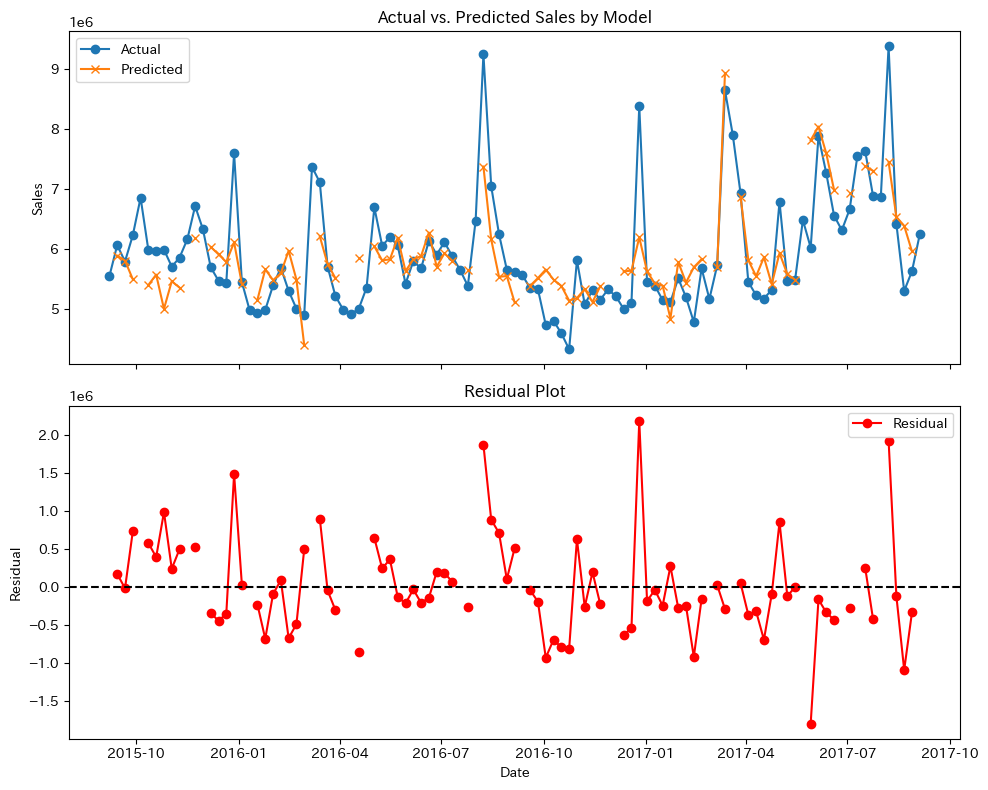

In [10]:
df_actual['Predicted'] = model.fittedvalues
df_actual['Residual'] = model.resid

df_actual.sort_values('Date', inplace=True)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

axes[0].plot(df_actual['Date'], df_actual['Sales'], label='Actual', marker='o')
axes[0].plot(df_actual['Date'], df_actual['Predicted'], label='Predicted', marker='x')
axes[0].set_ylabel('Sales')
axes[0].set_title('Actual vs. Predicted Sales by Model')
axes[0].legend()

axes[1].plot(df_actual['Date'], df_actual['Residual'], label='Residual', color='red', marker='o')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_ylabel('Residual')
axes[1].set_xlabel('Date')
axes[1].set_title('Residual Plot')
axes[1].legend()

plt.tight_layout()
plt.show()

# Model's Insight

Here are some insights based on the model output and test performance metrics:
1. Overall Model Fit (Training):
- The model explains about 57.2% of the variance in Sales (R² = 0.572, Adjusted R² = 0.550) on the training data.
- The overall F-test is highly significant (p ≈ 6.57e-14), indicating that at least one predictor is significantly associated with Sales.
2. Coefficient Estimates and Their Significance:
- Intercept (≈ 4.53e+06): This is the baseline Sales level when all predictors are zero (approximately 4.53 million).
- TVCM_GPR (≈ 1145.08): Although its coefficient is positive, it is not statistically significant (p = 0.200), suggesting that its effect on Sales is uncertain in this model.
- Print_Media (≈ 0.0247): This variable has a significant positive effect (p = 0.001). Each unit increase in Print_Media is associated with an increase of approximately 0.0247 units in Sales, implying that higher print advertising is linked to increased Sales.
- Offline_Ads (≈ -0.0487): This variable is statistically significant (p = 0.001) with a negative coefficient, indicating that increases in Offline_Ads are associated with a decrease in Sales. This counterintuitive result could be a signal of omitted variable bias or reverse causality that needs further investigation.
- Digital_Ads (≈ 33.18): Digital_Ads shows a strong and significant positive effect on Sales (p < 0.001), meaning that higher investment in digital advertising is associated with substantially higher Sales.
3. Diagnostics and Concerns:
- Multicollinearity: The condition number is extremely high (~3.9e+07), which suggests that multicollinearity among predictors might be an issue. This can inflate the standard errors and make it harder to determine the true effect of each predictor.
- Residual Diagnostics:
- The Durbin-Watson statistic is 2.284, which is close to 2 and suggests little to no autocorrelation in the residuals.
- However, the Omnibus and Jarque-Bera tests indicate that the residuals deviate from normality (JB p-value is very small). While this may not affect predictions severely, it can impact inference.
4. Test Set Performance:
- Test RMSE: The root mean squared error on the test set is about 737,075, which indicates that, on average, the predictions deviate from actual Sales by approximately 737,075 units.
- Test R-squared: The test R² is approximately 0.288, meaning the model only explains about 29% of the variability in Sales on unseen data. This substantial drop from the training R² suggests that the model’s predictive performance is much lower on new data, pointing to possible overfitting or that the model might be missing important predictors or non-linear relationships.

◾️ Overall Insight:
While the model appears to fit the training data moderately well, its predictive performance on the test data is quite low (with only 29% of the variance explained). Additionally, the presence of multicollinearity (indicated by the high condition number) and the non-significant effect of TVCM_GPR suggest that further model refinement is needed. This might include addressing multicollinearity (e.g., through variable selection or regularization techniques), exploring non-linear models, or incorporating additional relevant predictors to improve the model’s generalization to unseen data.

# Forecast

Forecast Results:
      Date  Forecast_Sales
2017-09-11    5.691974e+06
2017-09-18    5.889077e+06
2017-09-25    5.609420e+06
2017-10-02    5.665009e+06
2017-10-09    5.547695e+06
2017-10-16    5.449384e+06
2017-10-23    4.791624e+06
2017-10-30    5.715233e+06
2017-11-06    5.456871e+06
2017-11-13    5.196257e+06
2017-11-20    5.855155e+06
2017-11-27    6.056286e+06
2017-12-04    5.977067e+06
2017-12-11    5.990476e+06
2017-12-18    5.695558e+06
2017-12-25    6.470223e+06


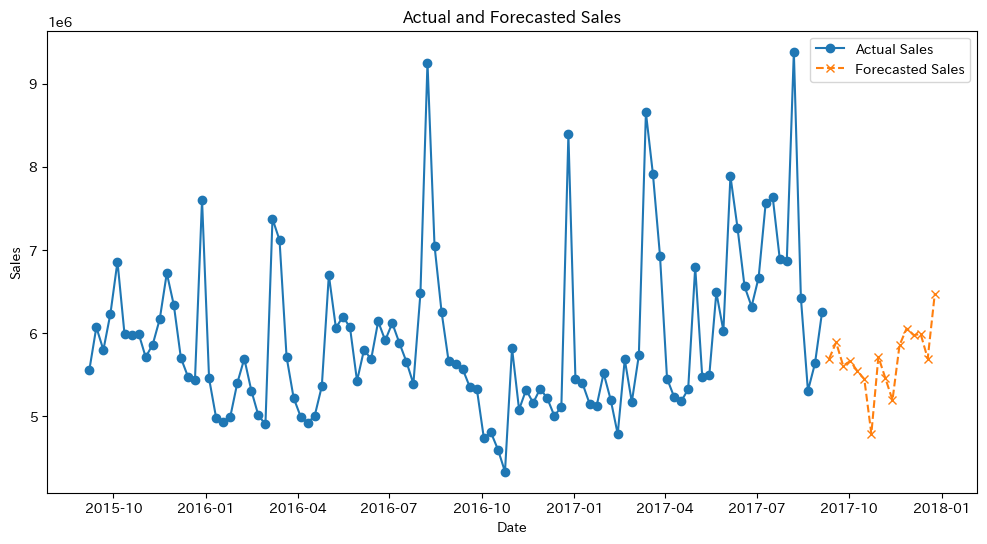

In [11]:
df_actual_combined = pd.concat([df_actual.loc[X_train.index], df_actual.loc[X_test.index]])
df_actual_combined = df_actual_combined.sort_values('Date')

df_forecast = df[df['Record_Type'] == "Forecast"].copy()

X_forecast = df_forecast[['TVCM_GPR', 'Print_Media', 'Offline_Ads', 'Digital_Ads']]
X_forecast = sm.add_constant(X_forecast)

df_forecast['Forecast_Sales'] = model.predict(X_forecast)

df_combined = pd.concat([df_actual_combined, df_forecast])
df_combined = df_combined.sort_values('Date')

print("Forecast Results:")
print(df_forecast[['Date', 'Forecast_Sales']].to_string(index=False))

plt.figure(figsize=(12,6))
plt.plot(df_actual_combined['Date'], df_actual_combined['Sales'], label='Actual Sales', marker='o')
plt.plot(df_forecast['Date'], df_forecast['Forecast_Sales'], label='Forecasted Sales', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual and Forecasted Sales')
plt.legend()
plt.show()